Case Study:2(Car_data_analysis)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
df=pd.read_csv('car_data.csv')

In [22]:
df.head()   

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,deprecates
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [17]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [18]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

1) From which manufacturing year to which manufacturing year vehicles are present in this data ?

In [10]:
min_year = df['Year'].min()
max_year = df['Year'].max()
print(f"Vehicles are present from the year {min_year} to {max_year}.")

Vehicles are present from the year 2003 to 2018.


2) What is the lowest price to which a vehicle is sold ?

In [12]:
lowest_price=df['Selling_Price'].min()
print(f"Lowest price of a car is {lowest_price} lakhs.")

Lowest price of a car is 0.1 lakhs.


3) What is the highest price to which a vehicle is sold ?

In [13]:
highest_price=df['Selling_Price'].max()
print(f"Highset price of a car is {highest_price} lakhs.")

Highset price of a car is 35.0 lakhs.


4) How many records are there in this data ?

In [20]:
record_count = df['Car_Name'].count()
print(f"Total number of records in the dataset are {record_count}.")

Total number of records in the dataset are 301.


5) Are there any missing records in this data ?

In [12]:
missing_records = df.isnull().sum().sum()
print(f"Number of missing records in the dataset are {missing_records}.")

Number of missing records in the dataset are 0.


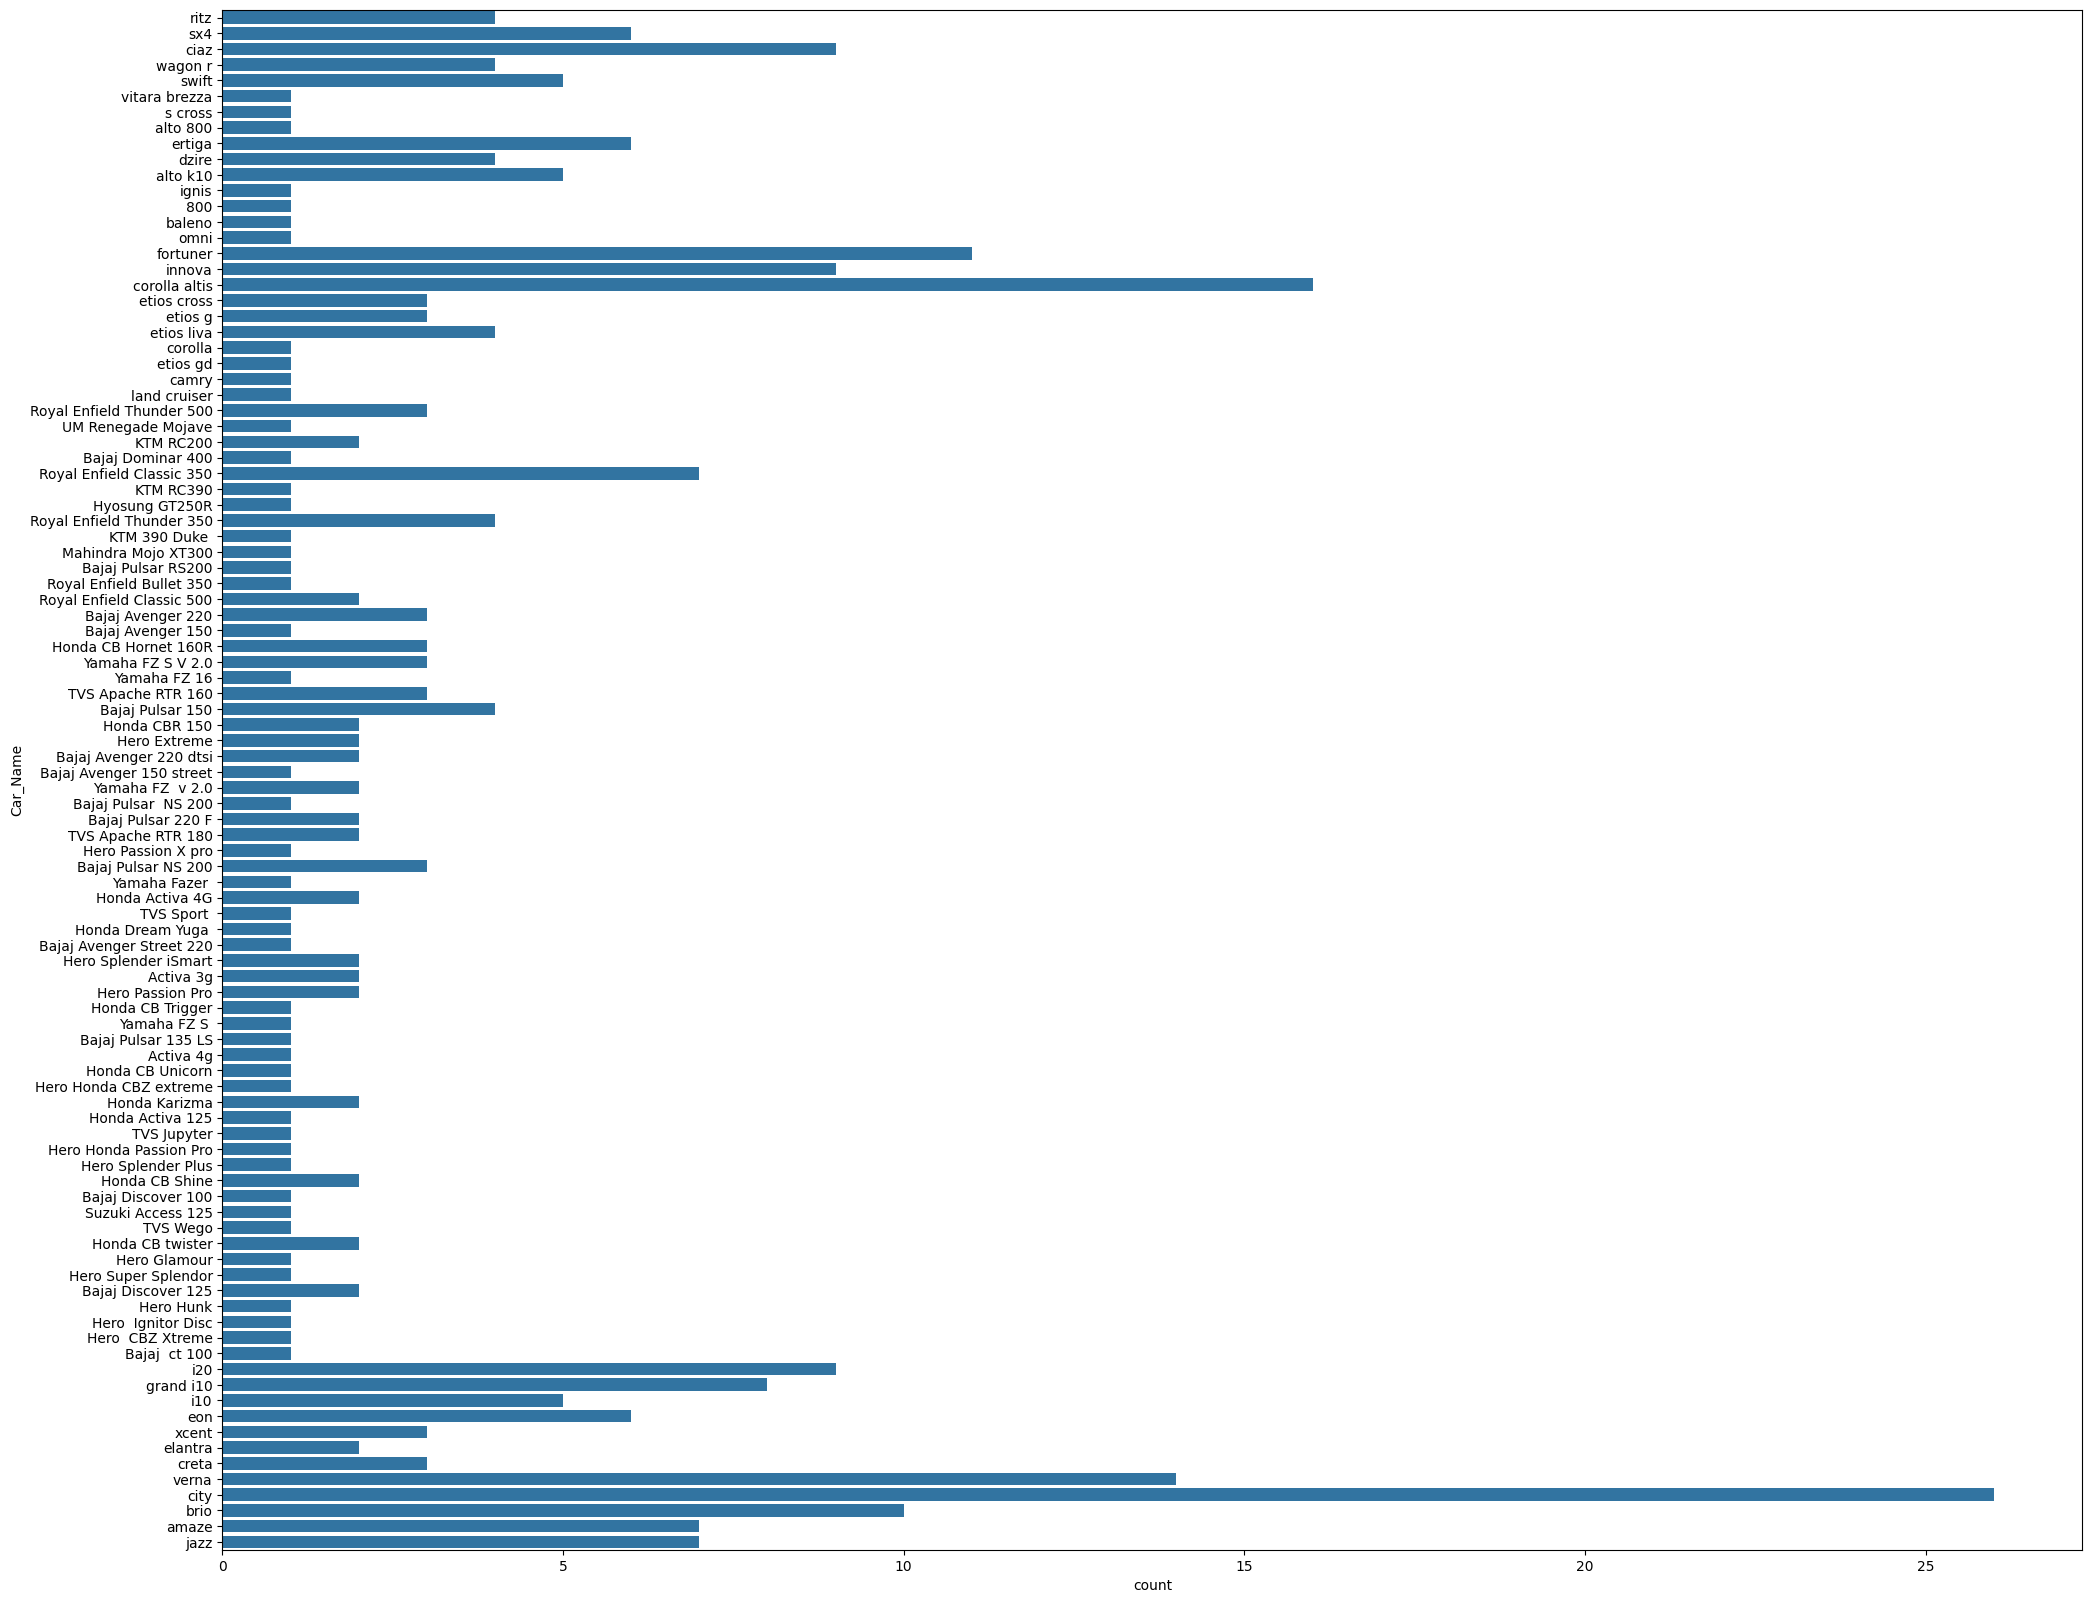

In [45]:
fig_dims = (24, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y='Car_Name', data=df, ax=ax, orient='h')
plt.show()

6) How many different vehicles are present in this data ?

In [13]:
vehicle_count=df['Car_Name'].unique()
print(f"Different no of vehicles in the dataset are {len(vehicle_count)}.")
#print(vehicle_count)

Different no of vehicles in the dataset are 98.


7) Which is the most sold vehicle in this data ?

In [14]:
most_sold = df['Car_Name'].value_counts().idxmax()
print(f"Most sold vehicle in the dataset is {most_sold}.")

Most sold vehicle in the dataset is city.


8) Does the database include any CNG vehicle ? If yes how many of them are there ?

In [15]:
CNG_vehicle = df[df['Fuel_Type']=='CNG']
CNG_vehicle_count = CNG_vehicle['Car_Name'].count()
print(f"Number of vehicles which runs on CNG are {CNG_vehicle_count}.")
print(CNG_vehicle) 

Number of vehicles which runs on CNG are 2.
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
18  wagon r  2015           3.25           5.09       35500       CNG   
35      sx4  2011           2.95           7.74       49998       CNG   

   Seller_Type Transmission  Owner  
18      Dealer       Manual      0  
35      Dealer       Manual      0  


9) How many vehicles here are for sell from Individuals directly ?

In [16]:
Vehicles = df[df['Seller_Type']=='Individual']
Vehicle_count=Vehicles['Car_Name'].count()
print(f"{Vehicle_count} vehicles here are for sell from Individuals directly")

106 vehicles here are for sell from Individuals directly


10) Does this database contain auto transmission vehicles ? If yes how many of them are there ?

In [17]:
auto_transmission_vehicles=df[df['Transmission']=='Automatic']
auto_transmission_vehicle_count=auto_transmission_vehicles['Car_Name'].count()
print(f"Number of vehicles with automatic transmission vehicles are {auto_transmission_vehicle_count}.")
                                                           

Number of vehicles with automatic transmission vehicles are 40.


11) How many single person owned vehicles are there in this database ?

In [18]:
single_owner_vehicles=df[df['Owner']==0]
single_owner_vehicle_count=single_owner_vehicles['Car_Name'].count()
print(f"Number of vehicles with single owner are {single_owner_vehicle_count}.")

Number of vehicles with single owner are 290.


12) Which is the most and least cost depreciated vehicle in data ?

In [28]:
#Highest depreciation observed from the vehicles in data
df['Depreciation'] = df['Present_Price'] - df['Selling_Price']
df.loc[df.Depreciation == df.Depreciation.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,deprecates,Depreciation
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0,57.6,57.6


In [29]:
#Lowest depreciation observed from the vehicles in data
df.loc[df.Depreciation == df.Depreciation.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,deprecates,Depreciation
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0,0.03,0.03


<Axes: xlabel='Depreciation', ylabel='Car_Name'>

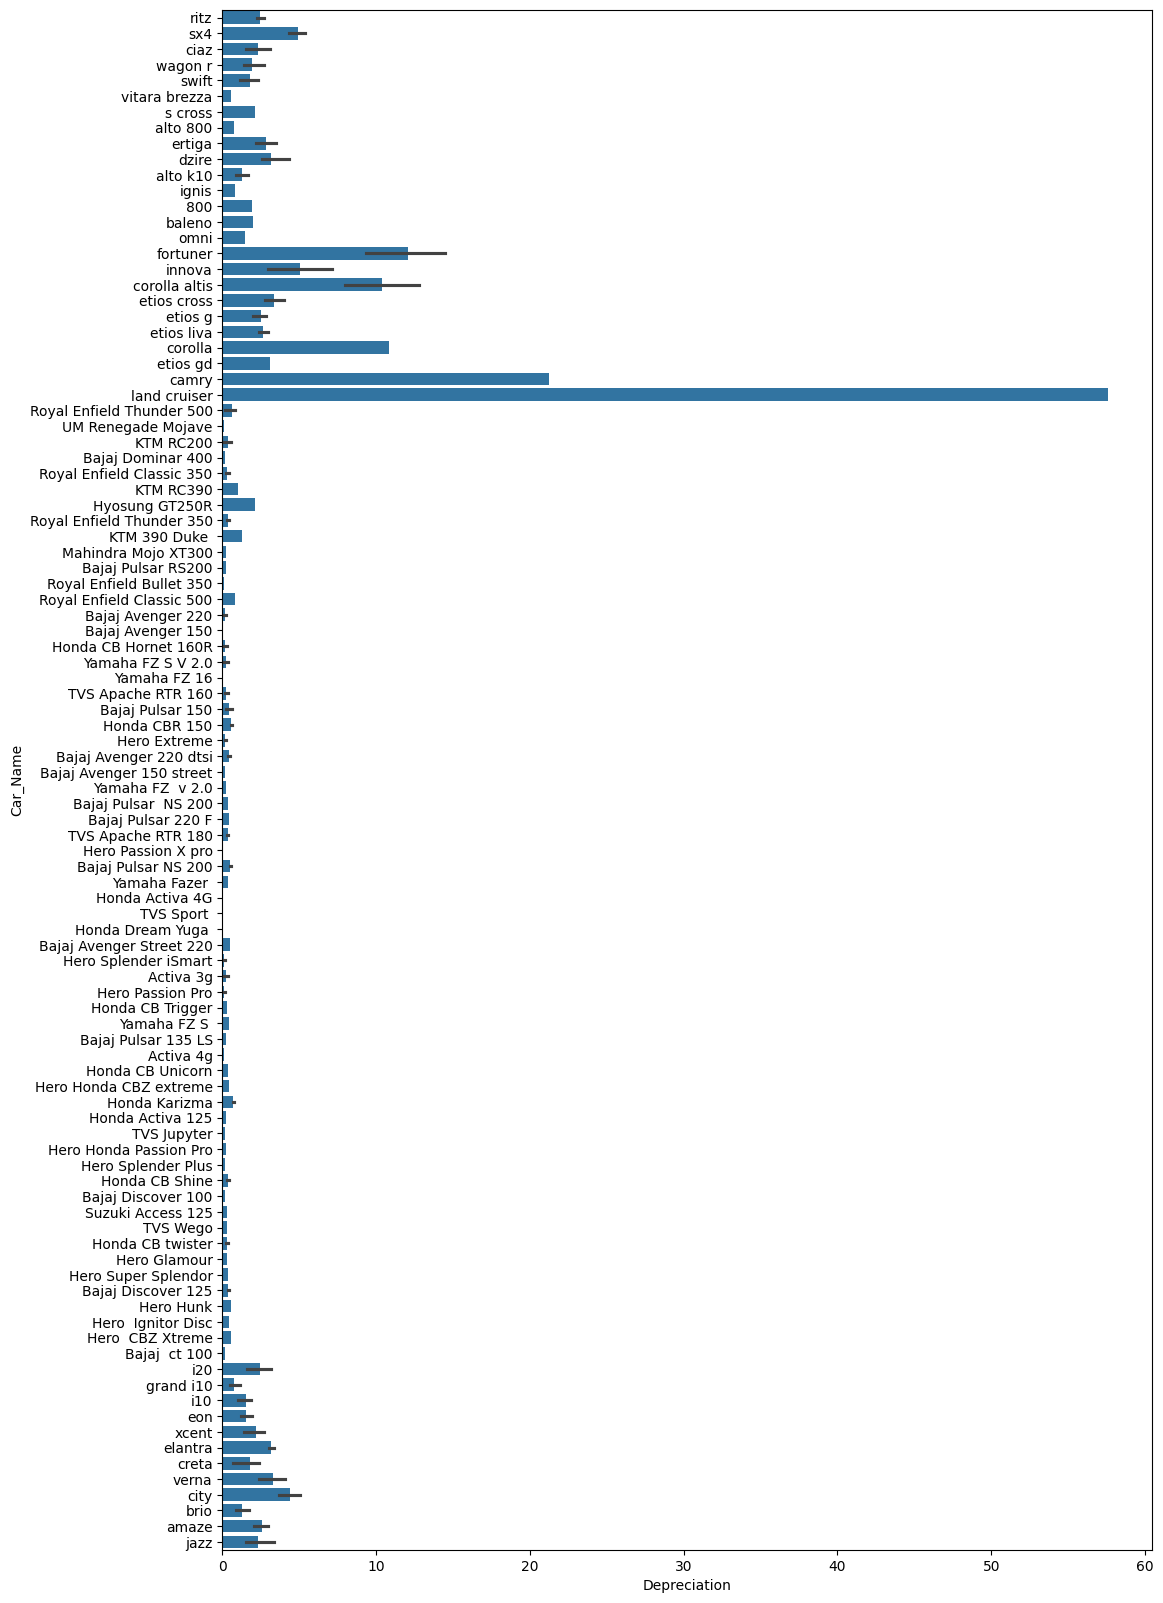

In [33]:
fig_dims=(12,20)
fig , ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = df.Depreciation,y = df.Car_Name,ax=ax)

13) Which brands of vehicles are less affected by cost depreciation ?

In [35]:
# Filter vehicles with low depreciation
low_depreciation_vehicles = df[df['Depreciation'] < df['Depreciation'].quantile(0.25)]

# Group by Car_Name and count the number of low depreciation vehicles for each brand
low_depreciation_brands = low_depreciation_vehicles['Car_Name'].value_counts()

print("Brands of vehicles that are less affected by cost depreciation:")
print(low_depreciation_brands)

Brands of vehicles that are less affected by cost depreciation:
Car_Name
Royal Enfield Classic 350    6
Bajaj Avenger 220            3
Royal Enfield Thunder 350    3
Yamaha FZ S V 2.0            3
Honda CB Hornet 160R         3
Honda Activa 4G              2
Activa 3g                    2
Hero Splender iSmart         2
TVS Apache RTR 180           2
Yamaha FZ  v 2.0             2
Hero Extreme                 2
TVS Apache RTR 160           2
Hero Passion Pro             2
Honda CB twister             2
verna                        2
i20                          1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Honda CB Unicorn             1
Honda Activa 125             1
TVS Jupyter                  1
Bajaj  ct 100                1
TVS Wego                     1
Bajaj Discover 125           1
Hero Splender Plus           1
Honda CB Shine               1
Hero Super Splendor          1
Bajaj Discover 100           1
Honda CB Trigger             1
Suzuki Access 125           

14) Are there any factors which you feel affect the cost depreciation ?

In [38]:
# Factors affecting cost depreciation
factors = ['Year', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
print("Factors that may affect cost depreciation are:", factors)

Factors that may affect cost depreciation are: ['Year', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


15) In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?

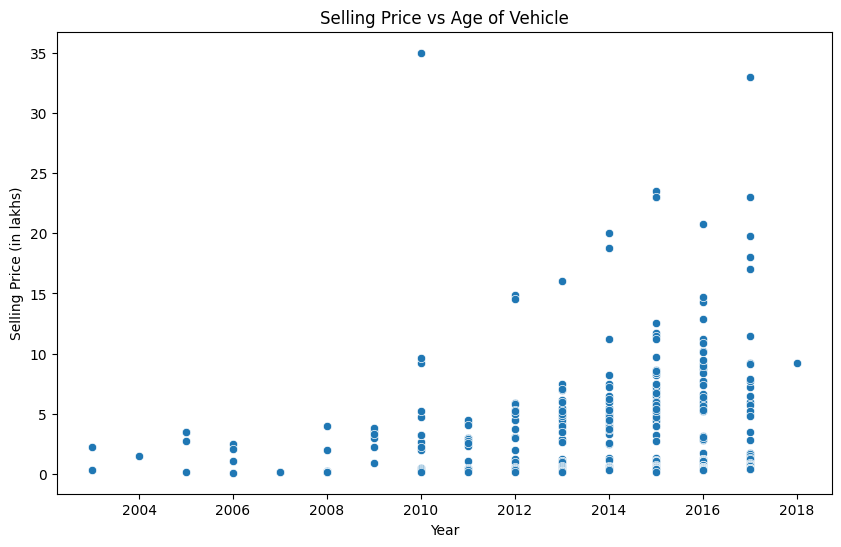

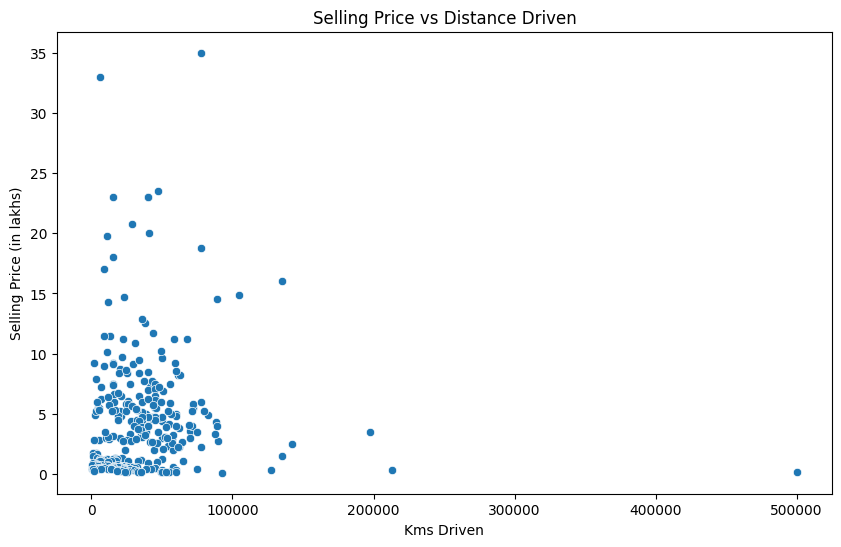

In [46]:
# Scatter plot for Selling Price vs Age of Vehicle
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Year'], y=df['Selling_Price'])
plt.title('Selling Price vs Age of Vehicle')
plt.xlabel('Year')
plt.ylabel('Selling Price (in lakhs)')
plt.show()

# Scatter plot for Selling Price vs Distance Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Kms_Driven'], y=df['Selling_Price'])
plt.title('Selling Price vs Distance Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price (in lakhs)')
plt.show()

16) Can we get idea about newest vehicles i.e. after 2014 manufactured ?

In [57]:
#Check out the newest vehicles on sale - 2015 or after 2015 manufactured
new_vehicles = df[df['Year'] >= 2015]
print(newest_vehicles)
new_vehicles.head()

          Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
2             ciaz  2017           7.25           9.85        6900    Petrol   
5    vitara brezza  2018           9.25           9.83        2071    Diesel   
8             ciaz  2016           8.75           8.89       20273    Diesel   
10        alto 800  2017           2.85           3.60        2135    Petrol   
15          ertiga  2016           7.75          10.79       43000    Diesel   
..             ...   ...            ...            ...         ...       ...   
289           city  2016          10.11          13.60       10980    Petrol   
292           jazz  2016           6.40           8.40       12000    Petrol   
296           city  2016           9.50          11.60       33988    Diesel   
299           city  2017          11.50          12.50        9000    Diesel   
300           brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  de

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,deprecates,Depreciation
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,2.60
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58,0.58
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,1.37,1.37
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,2.11,2.11
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.14,0.14


In [55]:
new_vehicles.reset_index(drop = True, inplace = True)
new_vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,deprecates,Depreciation
0,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,2.60
1,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58,0.58
2,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,1.37,1.37
3,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,2.11,2.11
4,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.14,0.14


<Axes: xlabel='count', ylabel='Car_Name'>

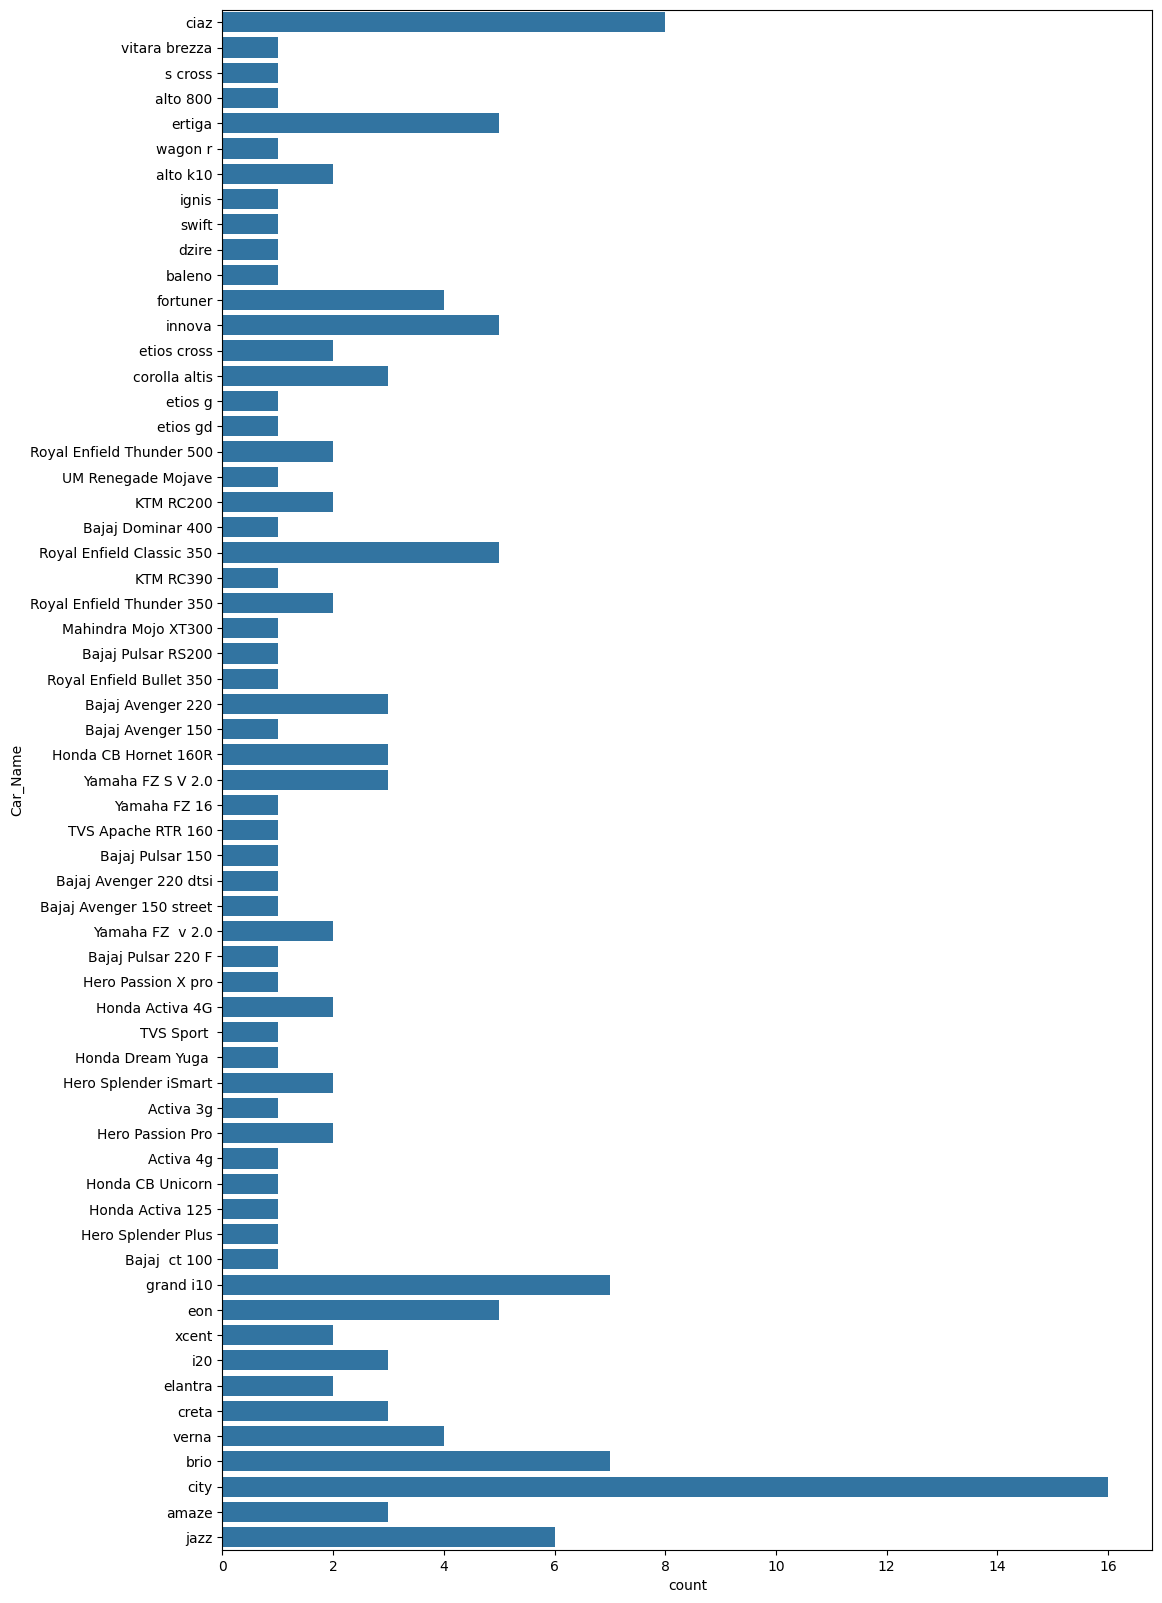

In [56]:
fig_dims = (12, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = new_vehicles.Car_Name,ax=ax, data = new_vehicles)

17) Can we find out data of only two wheelers from this data ?


In [61]:
two_wheelers=df[df['Present_Price']<3.5]
#print(two_wheelers)
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,deprecates,Depreciation
23,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0,0.96,0.96
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,1.93,1.93
44,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0,1.44,1.44
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15,0.15
101,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12,0.12


18) Which is the oldest bike sold here?

In [64]:
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.min()]


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,deprecates,Depreciation
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,1.93,1.93


19) Which is the newest bike sold here?


In [65]:
newest_bike = two_wheelers.loc[two_wheelers['Year'] == two_wheelers['Year'].max()]
print(newest_bike)

                      Car_Name  Year  Selling_Price  Present_Price  \
101         UM Renegade Mojave  2017           1.70           1.82   
102                  KTM RC200  2017           1.65           1.78   
103          Bajaj Dominar 400  2017           1.45           1.60   
104  Royal Enfield Classic 350  2017           1.35           1.47   
109  Royal Enfield Classic 350  2017           1.20           1.47   
126          Bajaj Avenger 220  2017           0.90           0.95   
128       Honda CB Hornet 160R  2017           0.80           0.87   
129          Yamaha FZ S V 2.0  2017           0.78           0.84   
130       Honda CB Hornet 160R  2017           0.75           0.87   
132          Bajaj Avenger 220  2017           0.75           0.95   
134         TVS Apache RTR 160  2017           0.65           0.81   
155            Honda Activa 4G  2017           0.48           0.51   
156                 TVS Sport   2017           0.48           0.52   
158          Honda D

20) Which is the most sold bike here?

In [68]:
most_sold_bike = two_wheelers['Car_Name'].value_counts().idxmax()
print(f"Most sold bike in the dataset is {most_sold_bike}.")    


Most sold bike in the dataset is Royal Enfield Classic 350.


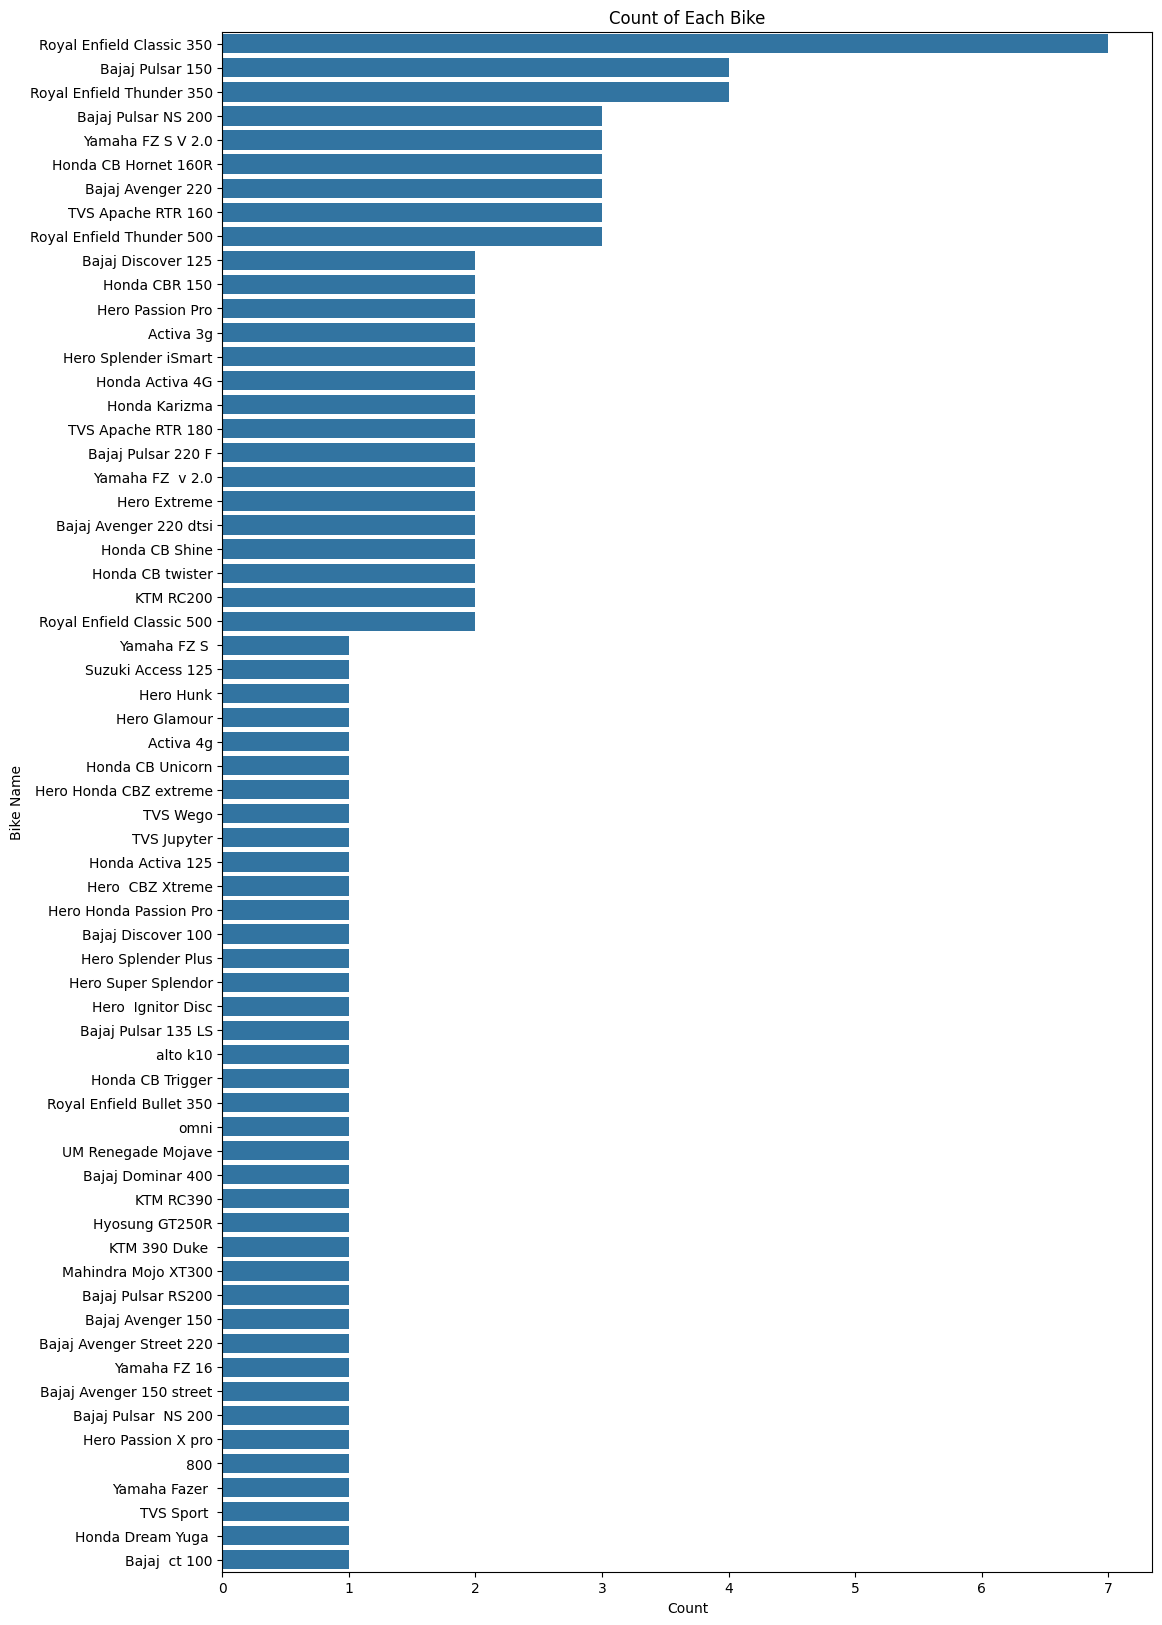

In [70]:
# Plot the count of each bike
plt.figure(figsize=(12, 20))
sns.countplot(y='Car_Name', data=two_wheelers, order=two_wheelers['Car_Name'].value_counts().index)
plt.title('Count of Each Bike')
plt.xlabel('Count')
plt.ylabel('Bike Name')
plt.show()

21) Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?


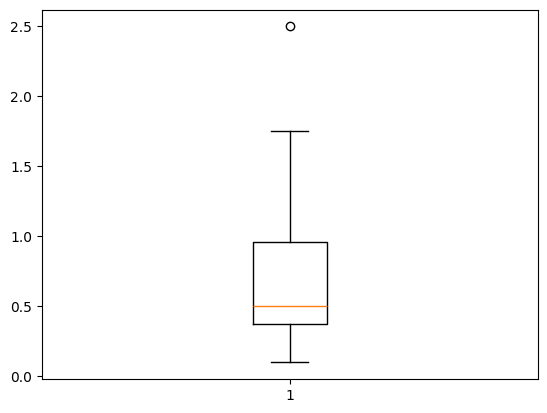

In [71]:
#To check whether any deal about two wheelers exceeded general expectation
plt.boxplot(two_wheelers.Selling_Price)
plt.show()

In [72]:
two_wheelers[two_wheelers.Selling_Price > 1.6]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,deprecates,Depreciation
23,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0,0.96,0.96
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15,0.15
101,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12,0.12
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13,0.13


22) Can we find out data of only cars from this data ?

In [74]:
cars = df[df["Present_Price"] > 2.0]
print(cars)
cars.head()

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  deprecates  Depreciation  
0        Dealer       Manual      0        2.24

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,deprecates,Depreciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,2.27


23) Which is the oldest car sold here?

In [77]:
oldest_car = cars.loc[cars['Year'] == cars['Year'].min()]
print(oldest_car)

   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
37      800  2003           0.35           2.28      127000    Petrol   
39      sx4  2003           2.25           7.98       62000    Petrol   

   Seller_Type Transmission  Owner  deprecates  Depreciation  
37  Individual       Manual      0        1.93          1.93  
39      Dealer       Manual      0        5.73          5.73  


24) Which is the newest car sold here?

In [78]:
newest_car = cars.loc[cars['Year'] == cars['Year'].max()]
print(newest_car)

        Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
5  vitara brezza  2018           9.25           9.83        2071    Diesel   

  Seller_Type Transmission  Owner  deprecates  Depreciation  
5      Dealer       Manual      0        0.58          0.58  


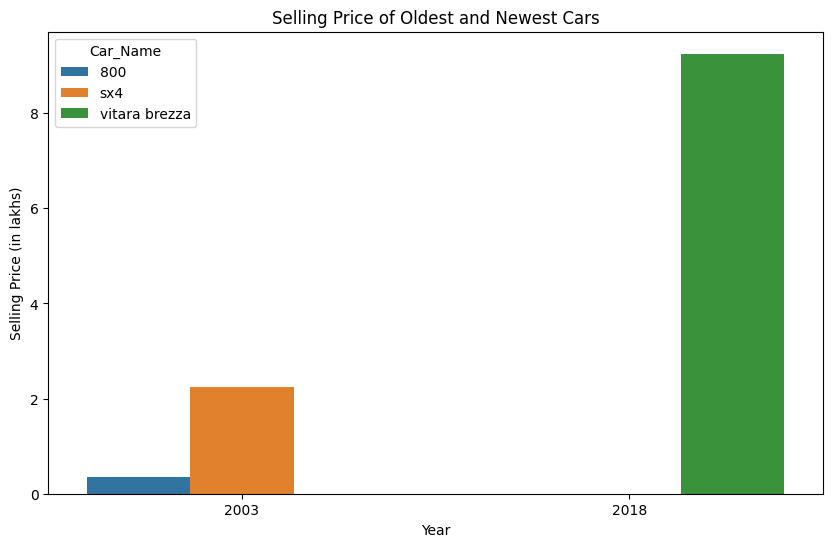

In [80]:
# Combine oldest and newest cars data
oldest_newest_cars = pd.concat([oldest_car, newest_car])

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Selling_Price', hue='Car_Name', data=oldest_newest_cars)
plt.title('Selling Price of Oldest and Newest Cars')
plt.xlabel('Year')
plt.ylabel('Selling Price (in lakhs)')
plt.show()

25) Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

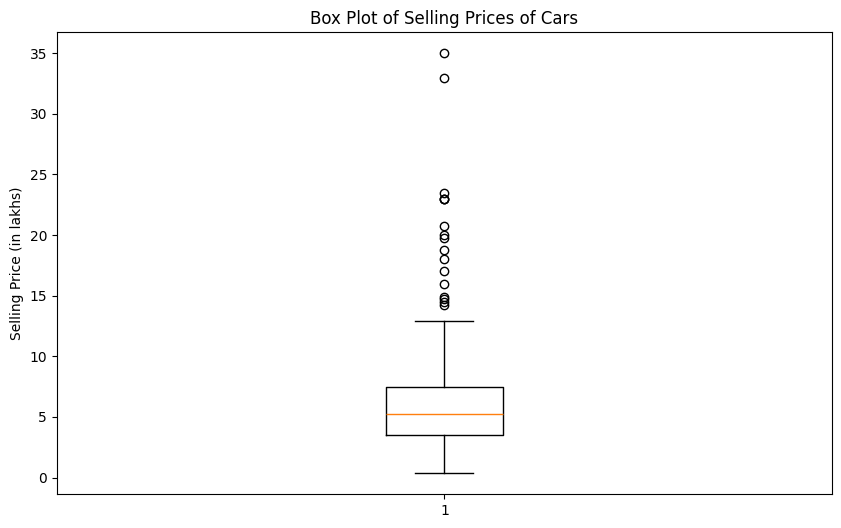

Deals in cars which exceeded general expectation:
         Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
50       fortuner  2012          14.90          30.61      104707    Diesel   
51       fortuner  2015          23.00          30.61       40000    Diesel   
52         innova  2017          18.00          19.77       15000    Diesel   
53       fortuner  2013          16.00          30.61      135000    Diesel   
59       fortuner  2014          19.99          35.96       41000    Diesel   
62       fortuner  2014          18.75          35.96       78000    Diesel   
63       fortuner  2015          23.50          35.96       47000    Diesel   
64       fortuner  2017          33.00          36.23        6000    Diesel   
66         innova  2017          19.75          23.15       11000    Petrol   
69  corolla altis  2016          14.25          20.91       12000    Petrol   
79       fortuner  2012          14.50          30.61       89000    Diesel   
80

In [81]:
# Create a box plot for Selling Price of cars
plt.figure(figsize=(10, 6))
plt.boxplot(cars['Selling_Price'])
plt.title('Box Plot of Selling Prices of Cars')
plt.ylabel('Selling Price (in lakhs)')
plt.show()

# Identify outliers in the Selling Price
Q1 = cars['Selling_Price'].quantile(0.25)
Q3 = cars['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = cars[(cars['Selling_Price'] < (Q1 - 1.5 * IQR)) | (cars['Selling_Price'] > (Q3 + 1.5 * IQR))]

print("Deals in cars which exceeded general expectation:")
print(outliers)

# Investigate reasons for outliers
# You can analyze the outliers based on various factors such as Year, Kms_Driven, Fuel_Type, etc.

It seems that many cars got exceptional deals here but we need to keep in mind that data contains cars from 
lowest to highest price range.So to get a clear picture distribution of selling and present price can be checked.

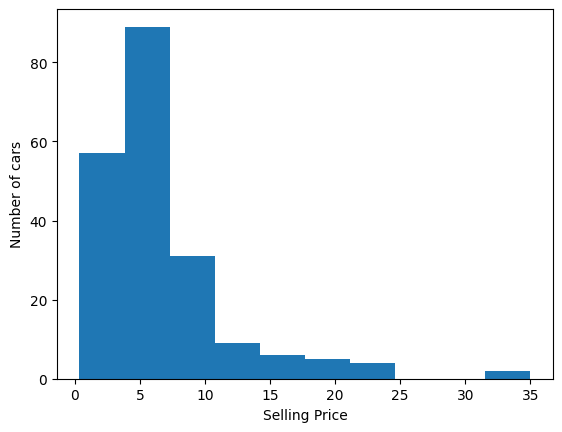

In [82]:
plt.hist(cars.Selling_Price)
plt.xlabel("Selling Price")
plt.ylabel("Number of cars")
plt.show()

<Axes: xlabel='Selling_Price'>

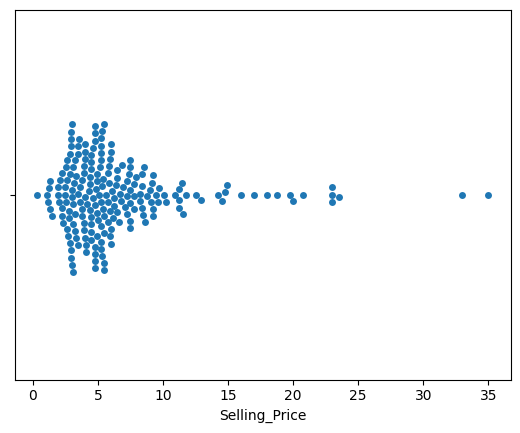

In [83]:
sns.swarmplot(x = cars.Selling_Price)

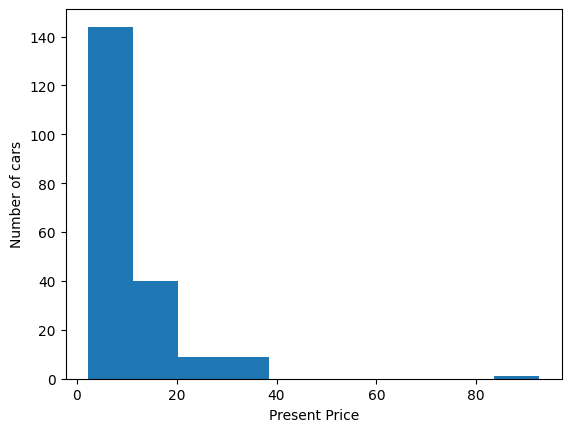

In [84]:
plt.hist(cars.Present_Price)
plt.xlabel("Present Price")
plt.ylabel("Number of cars")
plt.show()